In [19]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from skimage.io import imread
import os
from glob import glob

In [5]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('C:/study/Artem/data-scince_A/open program/datasets/bone_age/boneage-test-dataset.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'boneage-test-dataset.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 200 rows and 2 columns


In [18]:
base_bone_dir = os.path.join('..', 'C:/study/Artem/data-scince_A/open program/datasets/bone_age/')
age_df = pd.read_csv(os.path.join(base_bone_dir, 'boneage-training-dataset.csv'))
age_df['path'] = age_df['id'].map(lambda x: os.path.join(base_bone_dir,
                                                         'boneage-training-dataset', 
                                                         '{}.png'.format(x)))
age_df['exists'] = age_df['path'].map(os.path.exists)
print(age_df['exists'].sum(), 'images found of', age_df.shape[0], 'total')
age_df['gender'] = age_df['male'].map(lambda x: 'male' if x else 'female')
age_df.dropna(inplace = True)
age_df.sample(3)

12611 images found of 12611 total


,id,boneage,male,path,exists,gender
6660,8962,168,True,C:/study/Artem/data-scince_A/open program/data...,True,male
8722,11258,168,True,C:/study/Artem/data-scince_A/open program/data...,True,male
10743,13527,108,True,C:/study/Artem/data-scince_A/open program/data...,True,male


In [28]:
age_groups = 8
age_df['age_class'] = pd.qcut(age_df['boneage'], age_groups)
age_overview_df = age_df.groupby(['age_class', 
                                  'gender']).apply(lambda x: x.sample(1)
                                                             ).reset_index(drop = True
                                                                          )

In [8]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [9]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [10]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [12]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# boneage-training-dataset.csv has 12612 rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('C:/study/Artem/data-scince_A/open program/datasets/bone_age/boneage-training-dataset.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'boneage-training-dataset.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 3 columns


In [29]:
df1.head(5)

,Case ID,Sex
0,4360,M
1,4361,M
2,4362,M
3,4363,M
4,4364,M


In [13]:
df2.head(5)

,id,boneage,male
0,1377,180,False
1,1378,12,False
2,1379,94,False
3,1380,120,True
4,1381,82,False


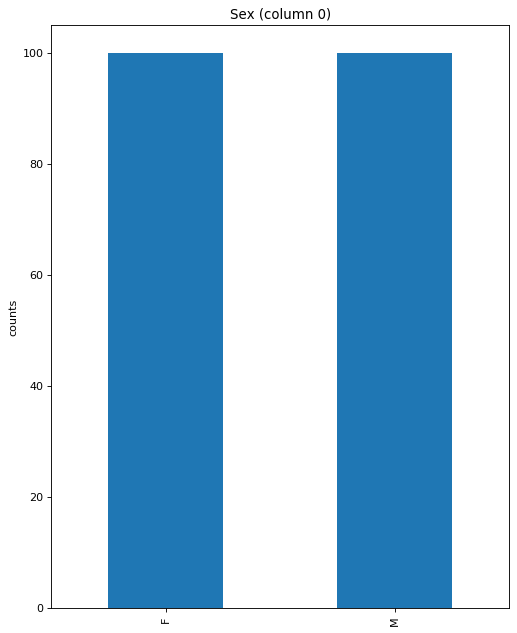

In [11]:
plotPerColumnDistribution(df1, 10, 5)

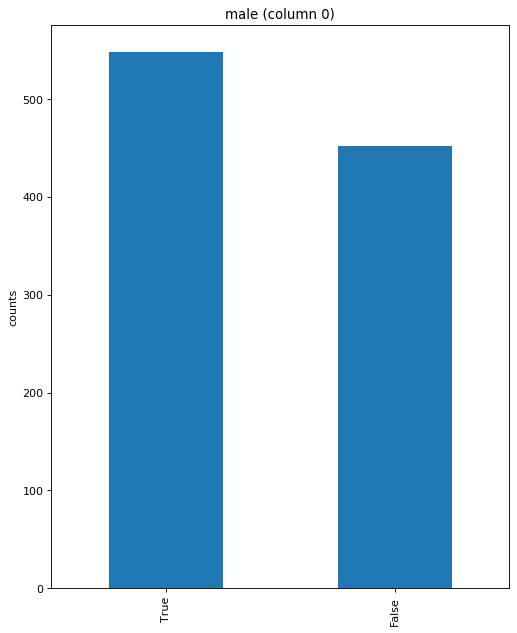

In [14]:
plotPerColumnDistribution(df2, 10, 5)

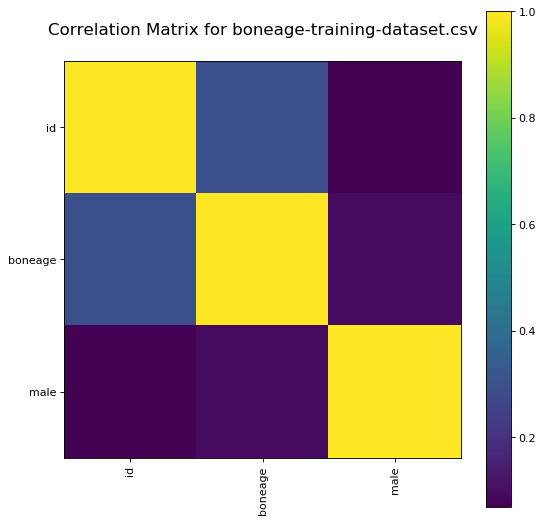

In [15]:
plotCorrelationMatrix(df2, 8)

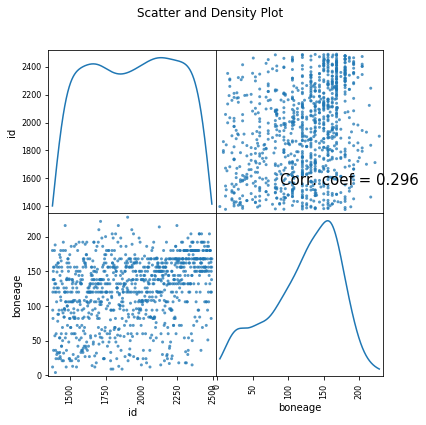

In [16]:
plotScatterMatrix(df2, 6, 15)

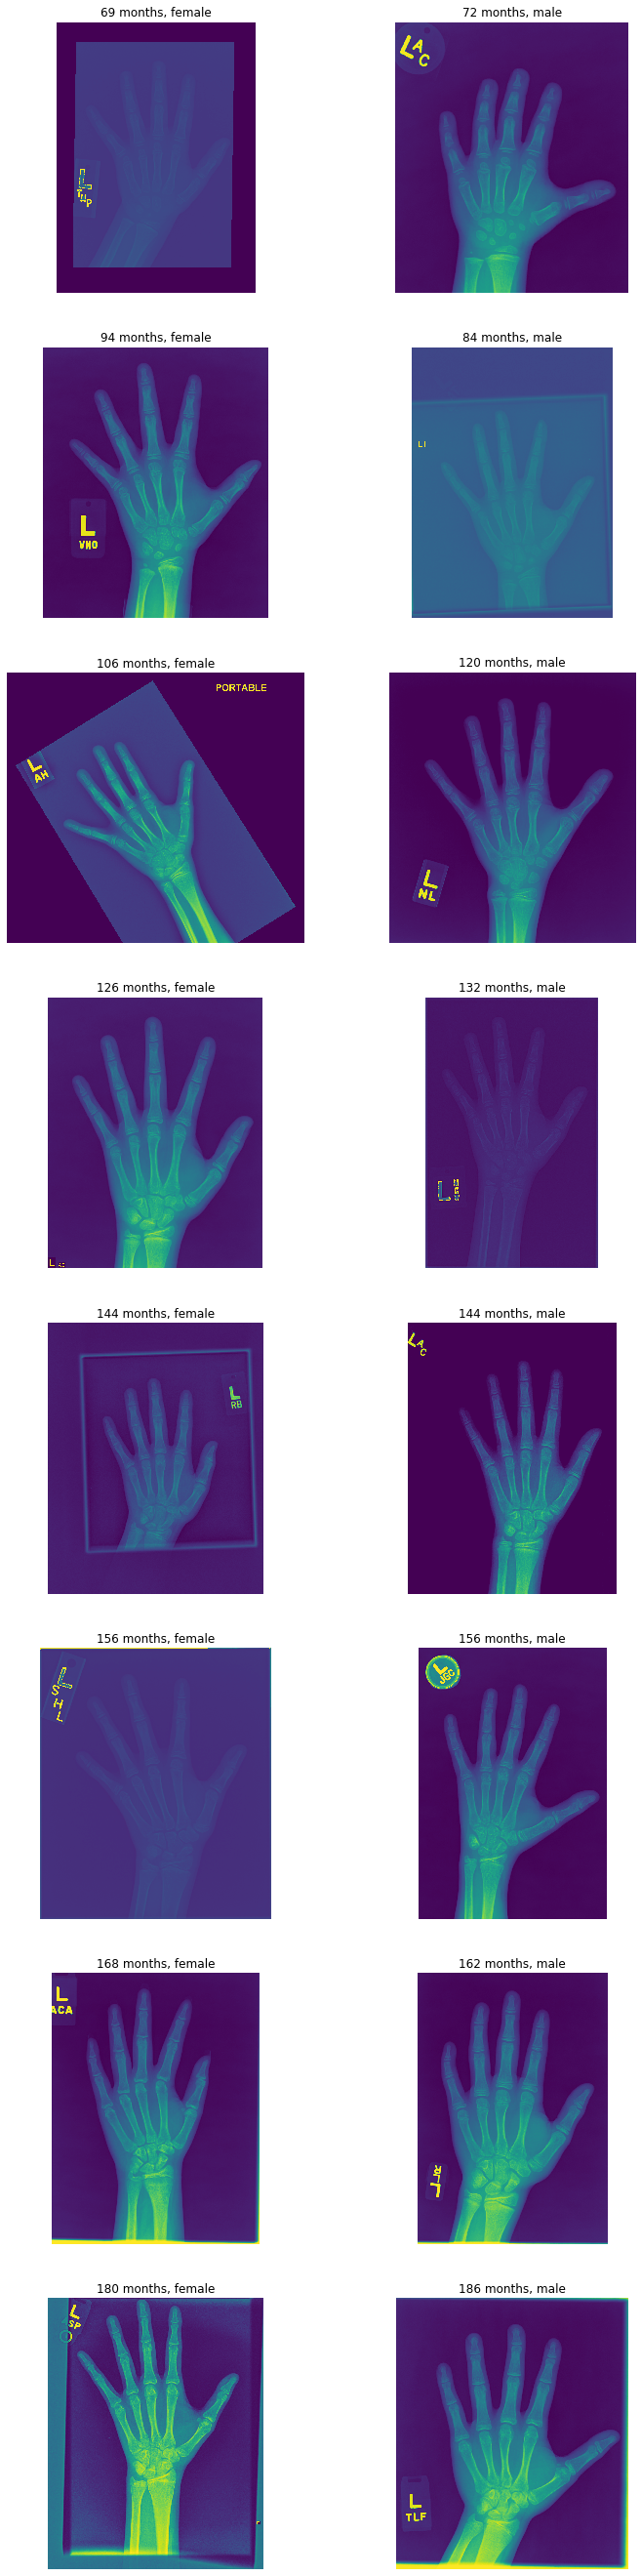

In [27]:
fig, m_axs = plt.subplots( age_groups, 2, figsize = (12, 6*age_groups))
for c_ax, (_, c_row) in zip(m_axs.flatten(), 
                            age_overview_df.sort_values(['age_class', 'gender']).iterrows()):
    c_ax.imshow(imread(c_row['path']),
                cmap = 'viridis')
    c_ax.axis('off')
    c_ax.set_title('{boneage} months, {gender}'.format(**c_row))